In [38]:
import pynucastro as pyna
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.rcParams['savefig.bbox']='tight'

## Partition Function Comparison

In this notebook we compare of several nuclei partition function (PF) $\sim 10^{10}\;\mathrm{K}$ based on their atomic number and their atomic mass. The function `plot_pf` below plot the PF for a list of nuclei `nuc` given an starting `tmin` and final `tmax` normalized temperature $T_9=T/(10^9\, \mathrm{K})$. The number of mesh points for each plot is given by `npoints`, and the plot output is stored in the `outfile` parameter.

In [39]:
def plot_pf(nuc, outfile='test.png', tmin=0.0, tmax=275, npoints=10000):

    max_nuc = len(nuc)
    for i in range(max_nuc):
        if not isinstance(nuc[i], pyna.Nucleus):
            nuc[i] = pyna.Nucleus(nuc[i])

    Tarray = np.linspace(tmin, tmax, npoints)
    Tarray *= 1.0e9

    pf_nuc = {}
    for n in nuc:
        pf_nuc[str(n)] = []
        for t in Tarray:
            pf_nuc[str(n)].append(n.partition_function(t))
        pf_nuc[str(n)] = np.array(pf_nuc[str(n)])

    fig = plt.figure(figsize=(8,6)) 
    ax = fig.add_subplot(111)
    for i in range(max_nuc):
        ax.plot(Tarray, pf_nuc[str(nuc[i])], c="C{}".format(i), ls="-", lw=1, label=rf"${pyna.Nucleus(str(nuc[i])).pretty}$")
    ax.legend(loc='upper left', fontsize=12)
    ax.set_ylim(1.0, 1.0e60)
    ax.set_xlim(1.0e9, 3.0e11)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$T\,\mathrm{[K]}$", fontsize=12)
    ax.set_ylabel(r"$G_{nuc}$", fontsize=12)
    ax.set_title("Partition Function Comparison", fontsize=16)

    fig.tight_layout()
    fig.savefig(outfile, bbox_inches="tight")

Here we considered several nuclei of the `iron56_end` network.

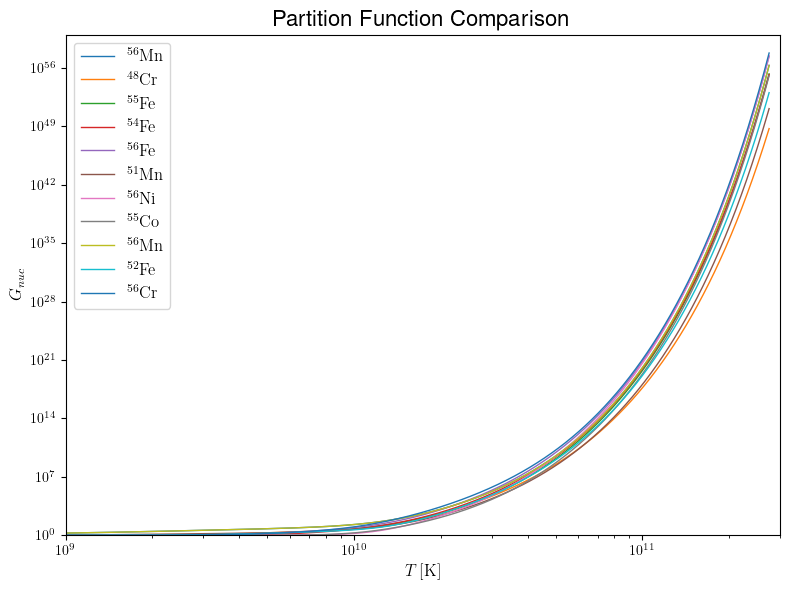

In [40]:
plot_pf(nuc=['mn56', 'cr48', 'fe55', 'fe54', 'fe56', 'mn51','ni56', 'co55', 'mn56', 'fe52', 'cr56'])

The next plot, compares the partition function of nuclei with similar atomic mass number $\sim 10^{10} \; \mathrm{K}$.

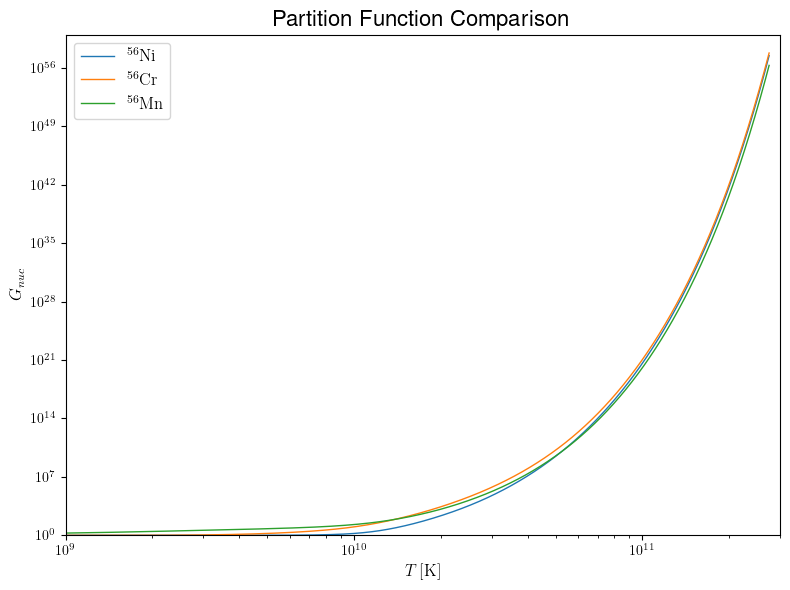

In [41]:
plot_pf(nuc=['ni56', 'cr56', 'mn56'], outfile='same_A_pf.pdf')

Finally, we compare the nuclei PF with the same atomic number $\sim 10^{10} \; \mathrm{K}$.

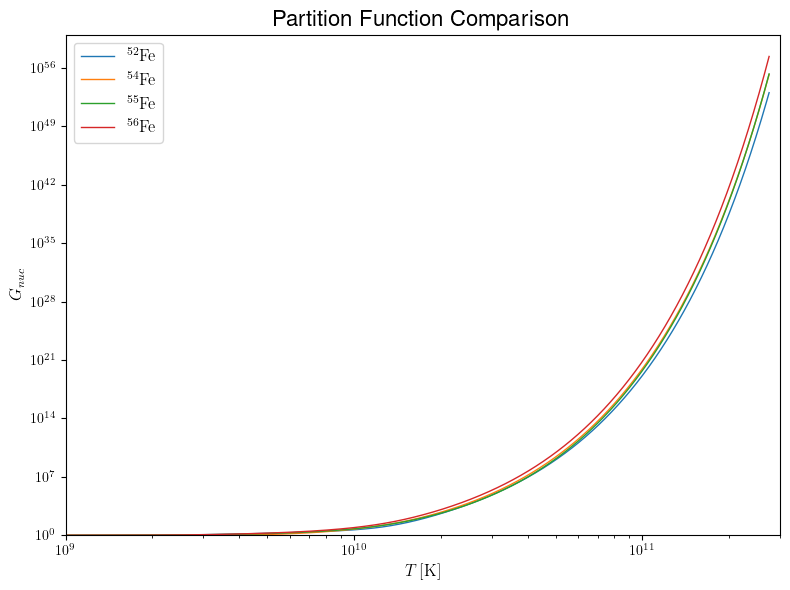

In [42]:
plot_pf(nuc=['fe52', 'fe54', 'fe55', 'fe56'], outfile='same_Z_pf.pdf')